In [3]:
import pandas as pd
import dalecLoad
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [4]:
def simpleRrsCalc(spectra, RHO=0.028):
    '''
    Takes Spectra and calcs Rrs using RHO. Needs a spectra generated by dalecLoad.uniform_grid_spectra_mean
    '''
    spectra['Rrs'] = (spectra['Lu_mean'] - (RHO * spectra['Lsky_mean'])) / spectra['Ed_mean']
    return spectra

In [5]:
tables = dalecLoad.multiLogLoad('data/21-jun-22/TESTLOG_20220622.dtf', dropNA=False)

In [6]:
tables['Log 1'] # carron valley

spectral_ind     Temp  Gearpos  Pitch  Heading         Lat  \
Sample #  Channel                                                               
5        Ed                  21   21.375      0.0    5.0    205.7         NaN   
         Ed                  22   21.375      0.0    5.0    205.7         NaN   
         Ed                  23   21.375      0.0    5.0    205.7         NaN   
         Ed                  24   21.375      0.0    5.0    205.7         NaN   
         Ed                  25   21.375      0.0    5.0    205.7         NaN   
...                         ...      ...      ...    ...      ...         ...   
40       Lu                 216  21.6875      0.0    5.0    204.9  56.0295791   
         Lu                 217  21.6875      0.0    5.0    204.9  56.0295791   
         Lu                 218  21.6875      0.0    5.0    204.9  56.0295791   
         Lu                 219  21.6875      0.0    5.0    204.9  56.0295791   
         Lu                 220  21.6875      0.0    5.0    204.9  56.0295791   

                   GPS_Fix      UTC Time  Integration Time  Solar Azi  \
Sample #  Channel                                                       
5        Ed              V  12:10:50.108                42        NaN   
         Ed              V  12:10:50.108                42        NaN   
         Ed              V  12:10:50.108                42        NaN   
         Ed              V  12:10:50.108                42        NaN   
         Ed              V  12:10:50.108                42        NaN   
...                    ...           ...               ...        ...   
40       Lu              A  12:11:59.031               256      179.6   
         Lu              A  12:11:59.031               256      179.6   
         Lu              A  12:11:59.031               256      179.6   
         Lu              A  12:11:59.031               256      179.6   
         Lu              A  12:11:59.031               256      179.6   

                    UTC Date  Roll   Saturation Flag  Voltage          Lon  \
Sample #  Channel                                                            
5        Ed       2022-06-21   1.0                 0     11.5          NaN   
         Ed       2022-06-21   1.0                 0     11.5          NaN   
         Ed       2022-06-21   1.0                 0     11.5          NaN   
         Ed       2022-06-21   1.0                 0     11.5          NaN   
         Ed       2022-06-21   1.0                 0     11.5          NaN   
...                      ...   ...               ...      ...          ...   
40       Lu       2022-06-21   0.0                 0     11.5  -4.06032180   
         Lu       2022-06-21   0.0                 0     11.5  -4.06032180   
         Lu       2022-06-21   0.0                 0     11.5  -4.06032180   
         Lu       2022-06-21   0.0                 0     11.5  -4.06032180   
         Lu       2022-06-21   0.0                 0     11.5  -4.06032180   

                   Relaz  Solar Elev  Spectral Magnitude  
Sample #  Channel                                         
5        Ed          NaN         NaN            0.231670  
         Ed          NaN         NaN            0.237858  
         Ed          NaN         NaN            0.236359  
         Ed          NaN         NaN            0.226115  
         Ed          NaN         NaN            0.227510  
...                  ...         ...                 ...  
40       Lu         25.3        57.7            0.001691  
         Lu         25.3        57.7            0.001588  
         Lu         25.3        57.7            0.001711  
         Lu         25.3        57.7            0.001530  
         Lu         25.3        57.7            0.001499  

[21600 rows x 18 columns]

In [7]:
tables['Log 2'] # loch coulter

spectral_ind     Temp  Gearpos  Pitch  Heading  Lat  \
Sample #  Channel                                                        
6        Ed                  21  20.9375      0.0    0.0    236.9  NaN   
         Ed                  22  20.9375      0.0    0.0    236.9  NaN   
         Ed                  23  20.9375      0.0    0.0    236.9  NaN   
         Ed                  24  20.9375      0.0    0.0    236.9  NaN   
         Ed                  25  20.9375      0.0    0.0    236.9  NaN   
...                         ...      ...      ...    ...      ...  ...   
24       Lu                 216   21.125     -0.1   -1.0    229.9  NaN   
         Lu                 217   21.125     -0.1   -1.0    229.9  NaN   
         Lu                 218   21.125     -0.1   -1.0    229.9  NaN   
         Lu                 219   21.125     -0.1   -1.0    229.9  NaN   
         Lu                 220   21.125     -0.1   -1.0    229.9  NaN   

                   GPS_Fix      UTC Time  Integration Time  Solar Azi  \
Sample #  Channel                                                       
6        Ed              V  10:55:22.042                32        NaN   
         Ed              V  10:55:22.042                32        NaN   
         Ed              V  10:55:22.042                32        NaN   
         Ed              V  10:55:22.042                32        NaN   
         Ed              V  10:55:22.042                32        NaN   
...                    ...           ...               ...        ...   
24       Lu              V  10:55:57.932               190        NaN   
         Lu              V  10:55:57.932               190        NaN   
         Lu              V  10:55:57.932               190        NaN   
         Lu              V  10:55:57.932               190        NaN   
         Lu              V  10:55:57.932               190        NaN   

                    UTC Date  Roll   Saturation Flag  Voltage  Lon  Relaz  \
Sample #  Channel                                                           
6        Ed       2022-06-21   0.0                 0     11.5  NaN    NaN   
         Ed       2022-06-21   0.0                 0     11.5  NaN    NaN   
         Ed       2022-06-21   0.0                 0     11.5  NaN    NaN   
         Ed       2022-06-21   0.0                 0     11.5  NaN    NaN   
         Ed       2022-06-21   0.0                 0     11.5  NaN    NaN   
...                      ...   ...               ...      ...  ...    ...   
24       Lu       2022-06-21   2.0                 0     11.5  NaN    NaN   
         Lu       2022-06-21   2.0                 0     11.5  NaN    NaN   
         Lu       2022-06-21   2.0                 0     11.5  NaN    NaN   
         Lu       2022-06-21   2.0                 0     11.5  NaN    NaN   
         Lu       2022-06-21   2.0                 0     11.5  NaN    NaN   

                   Solar Elev  Spectral Magnitude  
Sample #  Channel                                  
6        Ed               NaN            0.362570  
         Ed               NaN            0.371936  
         Ed               NaN            0.368973  
         Ed               NaN            0.354144  
         Ed               NaN            0.355251  
...                       ...                 ...  
24       Lu               NaN            0.002360  
         Lu               NaN            0.002452  
         Lu               NaN            0.002208  
         Lu               NaN            0.002087  
         Lu               NaN            0.002102  

[11400 rows x 18 columns]

In [8]:
tables['Log 3'] # north third

spectral_ind     Temp  Gearpos  Pitch  Heading         Lat  \
Sample #  Channel                                                               
5        Ed                  21    21.75     -0.3   -3.0    207.2         NaN   
         Ed                  22    21.75     -0.3   -3.0    207.2         NaN   
         Ed                  23    21.75     -0.3   -3.0    207.2         NaN   
         Ed                  24    21.75     -0.3   -3.0    207.2         NaN   
         Ed                  25    21.75     -0.3   -3.0    207.2         NaN   
...                         ...      ...      ...    ...      ...         ...   
40       Lu                 216  22.0625     -0.3    0.0    206.6  56.0803718   
         Lu                 217  22.0625     -0.3    0.0    206.6  56.0803718   
         Lu                 218  22.0625     -0.3    0.0    206.6  56.0803718   
         Lu                 219  22.0625     -0.3    0.0    206.6  56.0803718   
         Lu                 220  22.0625     -0.3    0.0    206.6  56.0803718   

                   GPS_Fix      UTC Time  Integration Time  Solar Azi  \
Sample #  Channel                                                       
5        Ed              V  09:29:57.115                58        NaN   
         Ed              V  09:29:57.115                58        NaN   
         Ed              V  09:29:57.115                58        NaN   
         Ed              V  09:29:57.115                58        NaN   
         Ed              V  09:29:57.115                58        NaN   
...                    ...           ...               ...        ...   
40       Lu              A  09:31:09.034               256      120.8   
         Lu              A  09:31:09.034               256      120.8   
         Lu              A  09:31:09.034               256      120.8   
         Lu              A  09:31:09.034               256      120.8   
         Lu              A  09:31:09.034               256      120.8   

                    UTC Date  Roll   Saturation Flag  Voltage          Lon  \
Sample #  Channel                                                            
5        Ed       2022-06-21   1.0                 0     11.5          NaN   
         Ed       2022-06-21   1.0                 0     11.5          NaN   
         Ed       2022-06-21   1.0                 0     11.5          NaN   
         Ed       2022-06-21   1.0                 0     11.5          NaN   
         Ed       2022-06-21   1.0                 0     11.5          NaN   
...                      ...   ...               ...      ...          ...   
40       Lu       2022-06-21   0.0                 0     11.5  -3.99969673   
         Lu       2022-06-21   0.0                 0     11.5  -3.99969673   
         Lu       2022-06-21   0.0                 0     11.5  -3.99969673   
         Lu       2022-06-21   0.0                 0     11.5  -3.99969673   
         Lu       2022-06-21   0.0                 0     11.5  -3.99969673   

                   Relaz  Solar Elev  Spectral Magnitude  
Sample #  Channel                                         
5        Ed          NaN         NaN            0.202928  
         Ed          NaN         NaN            0.206998  
         Ed          NaN         NaN            0.204715  
         Ed          NaN         NaN            0.195381  
         Ed          NaN         NaN            0.195843  
...                  ...         ...                 ...  
40       Lu         85.8        46.3            0.001686  
         Lu         85.8        46.3            0.001616  
         Lu         85.8        46.3            0.001545  
         Lu         85.8        46.3            0.001487  
         Lu         85.8        46.3            0.001535  

[21600 rows x 18 columns]

In [ ]:
spect_wavelengths = dalecLoad.load_DALEC_spect_wavelengths('data/21-jun-22/TESTLOG_20220622.dtf')
north_third = dalecLoad.uniform_grid_spectra_mean(tables['Log 3'], spect_wavelengths)
coulter = dalecLoad.uniform_grid_spectra_mean(tables['Log 2'], spect_wavelengths)
carron = dalecLoad.uniform_grid_spectra_mean(tables['Log 1'], spect_wavelengths)


In [ ]:
north_third_sample = dalecLoad.uniform_grid_spectra_mean(tables['Log 3'].loc[5, :],
                                                         spect_wavelengths)

north_third_sample = simpleRrsCalc(north_third_sample)
north_third_sample

plt.plot(north_third_sample['Wavelength'], north_third_sample['Rrs'], label='north third')


In [ ]:
# very simple Rrs calculation
RHO = 0.028

north_third['Rrs'] = (north_third['Lu_mean'] - (RHO * north_third['Lsky_mean'])) / north_third['Ed_mean']
coulter['Rrs'] = (coulter['Lu_mean'] - (RHO * coulter['Lsky_mean'])) / coulter['Ed_mean']
carron['Rrs'] = (carron['Lu_mean'] - (RHO * carron['Lsky_mean'])) / carron['Ed_mean']


fig, ax = plt.subplots(1, 3, figsize=(15,7))
ax[0].plot(north_third['Wavelength'], north_third['Rrs'], label='north third')
ax[1].plot(coulter['Wavelength'], coulter['Rrs'], label='loch coulter')
ax[2].plot(carron['Wavelength'], carron['Rrs'], label='carron valley')
ax[0].legend()
ax[1].legend()
ax[2].legend()


plt.show()

In [ ]:
north_third['abs'] = 1/north_third['Rrs']
plt.plot(north_third['Wavelength'], north_third['abs'])

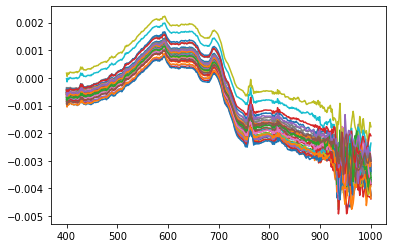

In [9]:
spect_wavelengths = dalecLoad.load_DALEC_spect_wavelengths('data/21-jun-22/TESTLOG_20220622.dtf')

for sample in tables['Log 3'].index.get_level_values('Sample #').unique():
    spectra = dalecLoad.uniform_grid_spectra_Rrs(tables['Log 3'].loc[sample],
                                       spect_wavelengths)
    plt.plot(spectra['Wavelength'], (spectra['Rrs']))

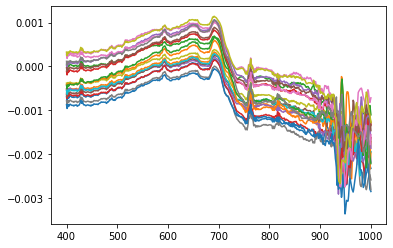

In [10]:
for sample in tables['Log 2'].index.get_level_values('Sample #').unique():
    spectra = dalecLoad.uniform_grid_spectra_Rrs(tables['Log 2'].loc[sample],
                                       spect_wavelengths)
    plt.plot(spectra['Wavelength'], spectra['Rrs'])

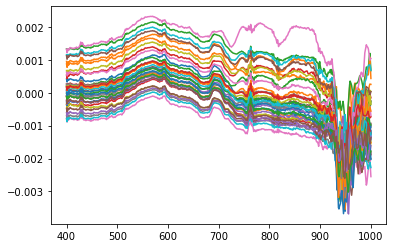

In [14]:
for sample in tables['Log 1'].index.get_level_values('Sample #').unique():
    spectra = dalecLoad.uniform_grid_spectra_Rrs(tables['Log 1'].loc[sample],
                                       spect_wavelengths)
    plt.plot(spectra['Wavelength'], (spectra['Rrs']))

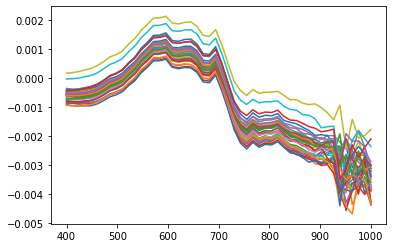

In [22]:
# let's see what happens if we use different regridding params
# regridding seems to work well...

for sample in tables['Log 3'].index.get_level_values('Sample #').unique():
    spectra = dalecLoad.uniform_grid_spectra_Rrs(tables['Log 3'].loc[sample],
                                                 spect_wavelengths,
                                                 nsteps=50)
    plt.plot(spectra['Wavelength'], spectra['Rrs'])